In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataframe = pd.read_csv("Zomato data .csv")
print(dataframe.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [4]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)
 
dataframe['rate']=dataframe['rate'].apply(handleRate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [30]:
dataframe.describe()

,rate,votes,approx_cost(for two people)
count,148.000000,148.000000,148.000000
mean,3.633108,264.810811,418.243243
std,0.402271,653.676951,223.085098
min,2.600000,0.000000,100.000000
25%,3.300000,6.750000,200.000000
50%,3.700000,43.500000,400.000000
75%,3.900000,221.750000,600.000000
max,4.600000,4884.000000,950.000000


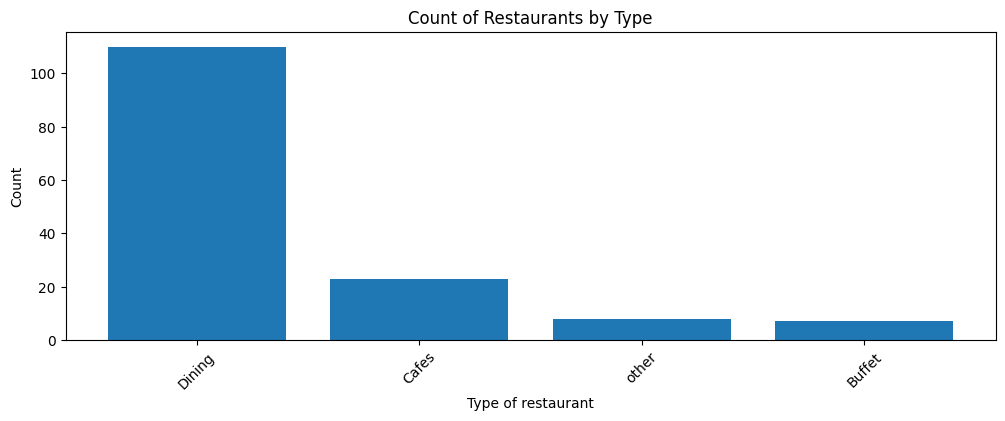

In [33]:
counts = dataframe['listed_in(type)'].value_counts()  # Count the occurrences of each category

# Plotting the counts using Matplotlib
plt.figure(figsize=(12,4))
plt.bar(counts.index, counts.values)
plt.xlabel("Type of restaurant")
plt.ylabel("Count")
plt.title("Count of Restaurants by Type")
plt.xticks(rotation=45)  # Rotate x labels for better readability if necessary
plt.show()

Text(0, 0.5, 'Votes')

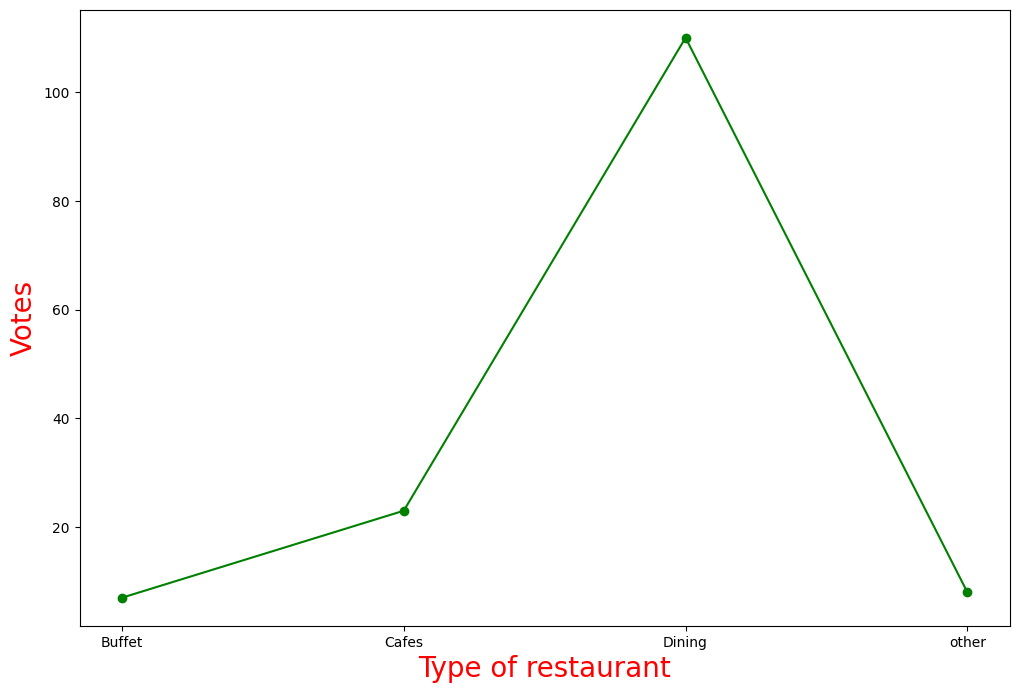

In [25]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].count()
result = pd.DataFrame({'votes': grouped_data})
plt.figure(figsize=(12,8))
plt.plot(result, c="green", marker="o")
plt.xlabel("Type of restaurant", c="red", size=20)
plt.ylabel("Votes", c="red", size=20)

Text(0, 0.5, 'approx_cost(for two people)')

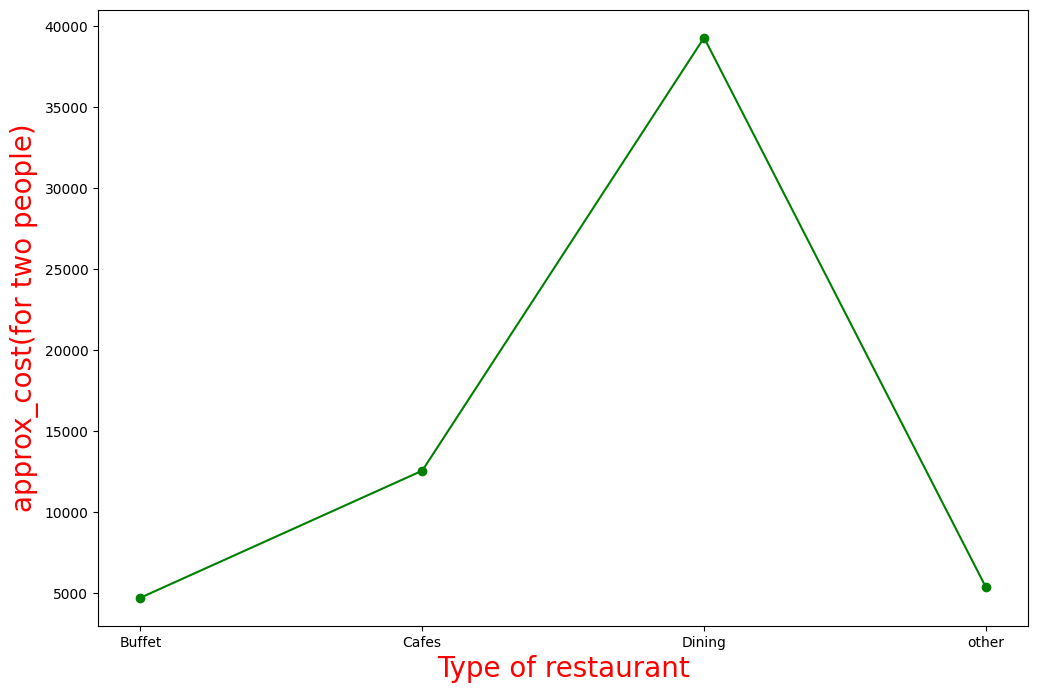

In [24]:
grouped_data = dataframe.groupby('listed_in(type)')['approx_cost(for two people)'].sum()
result = pd.DataFrame({'approx_cost(for two people)': grouped_data})
plt.figure(figsize=(12,8))
plt.plot(result, c="green", marker="o")
plt.xlabel("Type of restaurant", c="red", size=20)
plt.ylabel("approx_cost(for two people)", c="red", size=20)

In [9]:
max_votes = dataframe['votes'].max()
restaurant_with_max_votes = dataframe.loc[dataframe['votes'] == max_votes, 'name']
 
print("Restaurant(s) with the maximum votes:")
print(restaurant_with_max_votes)

Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


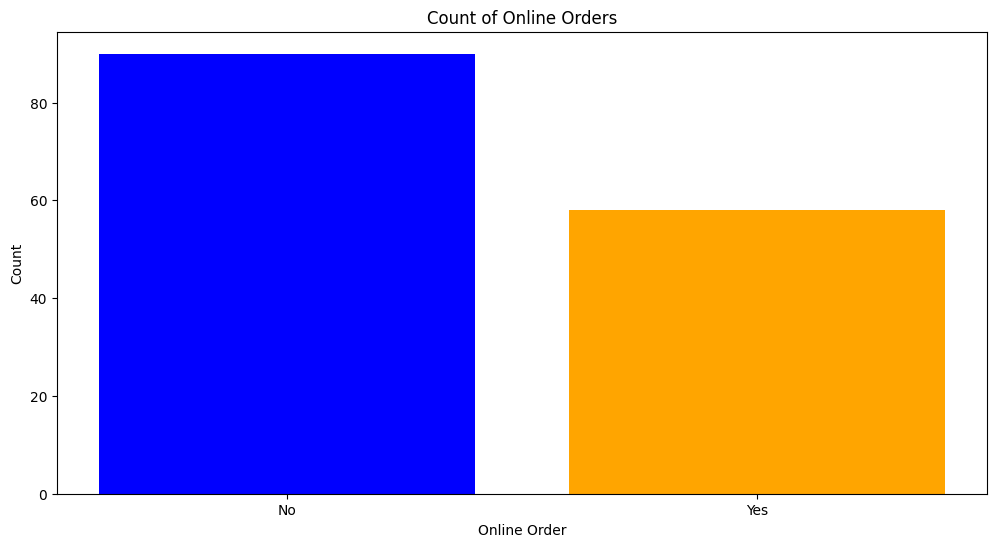

In [34]:

# Assuming `data` is your DataFrame
counts = dataframe['online_order'].value_counts()  # Count the occurrences of each category

# Plotting the counts using Matplotlib
plt.figure(figsize=(12,6))
plt.bar(counts.index, counts.values, color=['blue', 'orange'])  # Choose colors as you like
plt.xlabel("Online Order")
plt.ylabel("Count")
plt.title("Count of Online Orders")
plt.show()

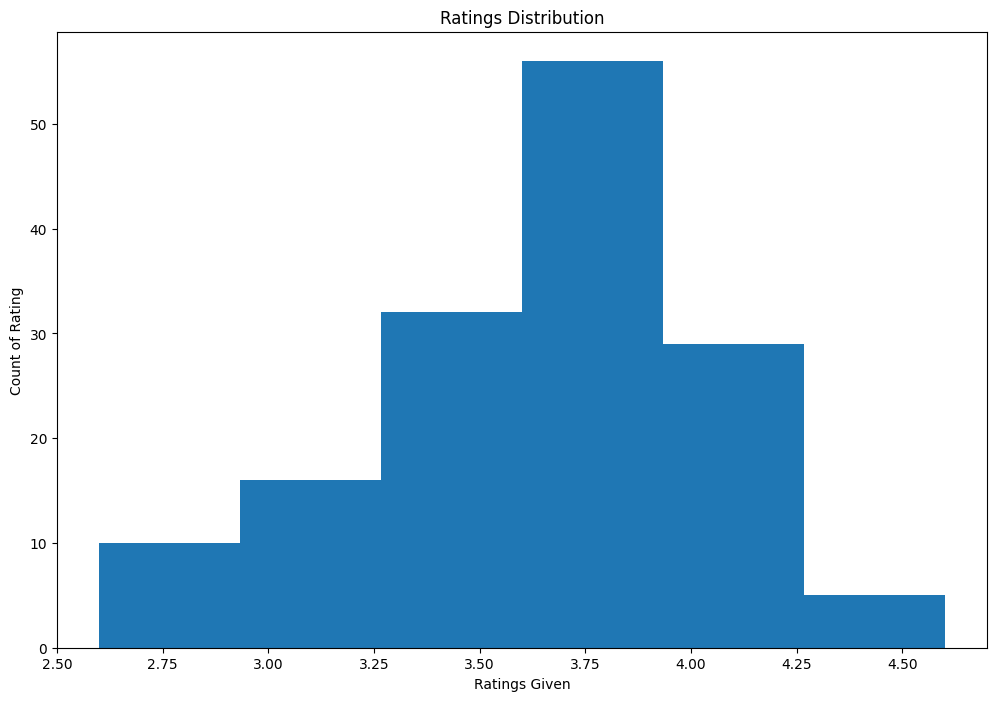

In [22]:
plt.figure(figsize=(12,8))
plt.hist(dataframe['rate'],bins=6)
plt.title("Ratings Distribution")
plt.xlabel("Ratings Given")
plt.ylabel("Count of Rating")
plt.show()

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 [Text(0.0, 0, '0'),
  Text(200.0, 0, '200'),
  Text(400.0, 0, '400'),
  Text(600.0, 0, '600'),
  Text(800.0, 0, '800'),
  Text(1000.0, 0, '1000'),
  Text(1200.0, 0, '1200')])

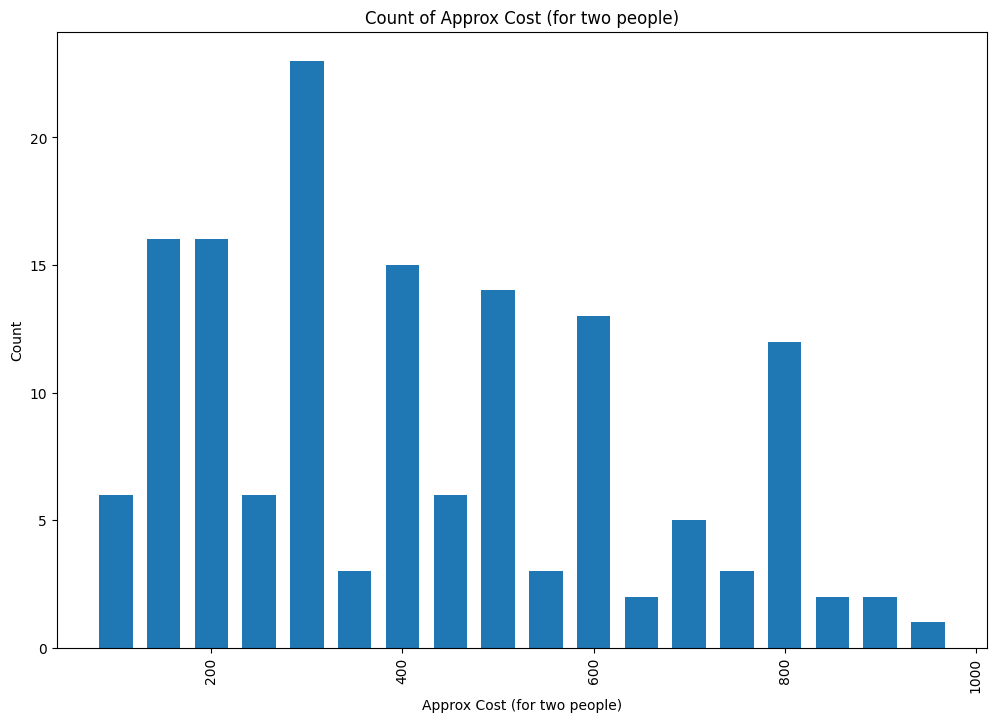

In [29]:
couple_data = dataframe['approx_cost(for two people)']
counts = couple_data.value_counts()  # Count the occurrences and sort by cost
# Plotting the counts using Matplotlib
plt.figure(figsize=(12,8))
plt.bar(counts.index, counts.values,width=35)
plt.xlabel("Approx Cost (for two people)")
plt.ylabel("Count")
plt.title("Count of Approx Cost (for two people)")
plt.xticks(rotation=90)# Rotate x labels for better readability if there are many categories

C:\Users\srajp\AppData\Local\Temp\ipykernel_17868\3735623991.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(online_order_groups, labels=online_order_groups.index)


<Figure size 600x600 with 0 Axes>

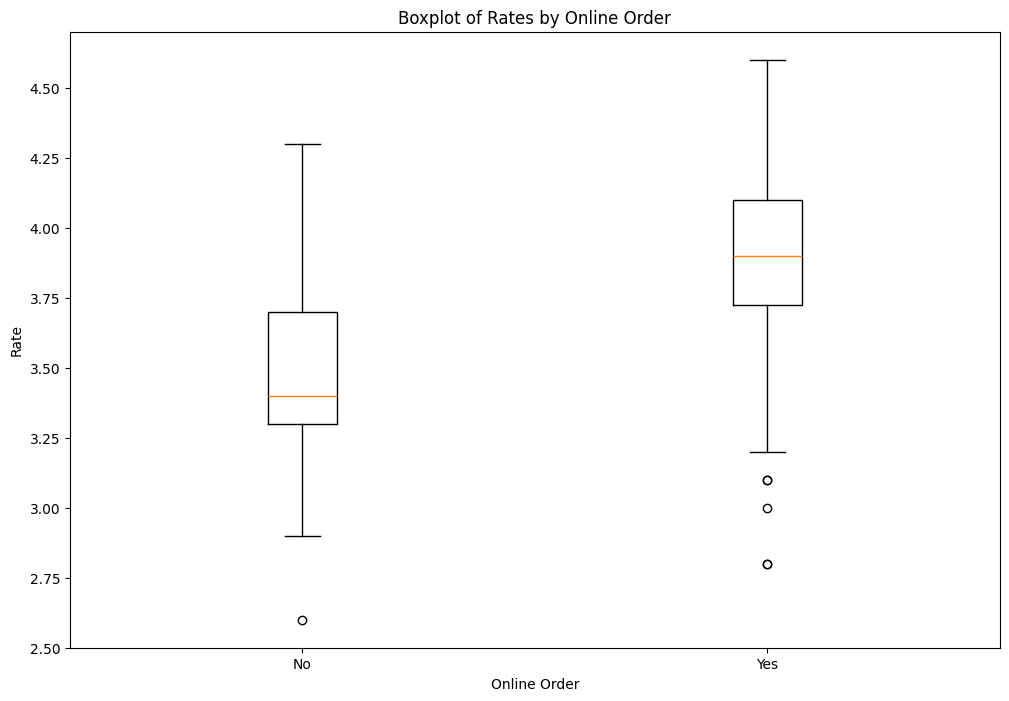

In [27]:
online_order_groups = dataframe.groupby('online_order')['rate'].apply(list)

# Create a figure and axis
plt.figure(figsize=(6, 6))

# Plotting the boxplot using Matplotlib
plt.figure(figsize=(12,8))
plt.boxplot(online_order_groups, labels=online_order_groups.index)

# Setting labels and title
plt.xlabel("Online Order")
plt.ylabel("Rate")
plt.title("Boxplot of Rates by Online Order")

plt.show()

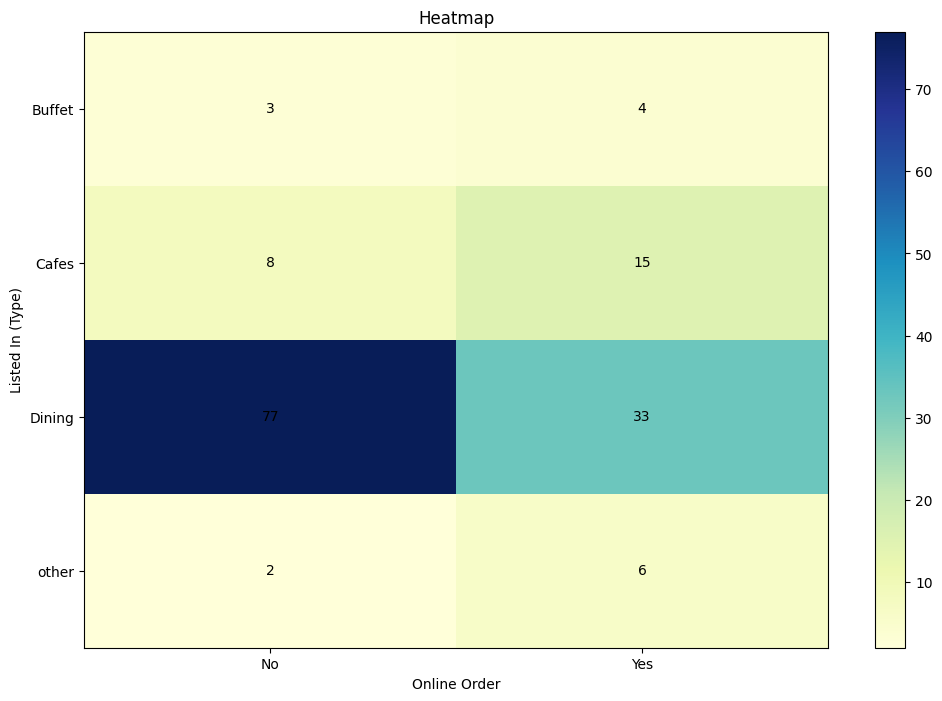

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming `dataframe` is your DataFrame
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)

# Create a figure and axis
plt.figure(figsize=(12,8))

# Plotting the heatmap using Matplotlib
plt.imshow(pivot_table, cmap="YlGnBu", aspect='auto')

# Adding the color bar
plt.colorbar()

# Annotating the heatmap with the counts
for i in range(pivot_table.shape[0]):
    for j in range(pivot_table.shape[1]):
        plt.text(j, i, pivot_table.iloc[i, j], ha='center', va='center', color='black')

# Setting the ticks and labels
plt.xticks(ticks=np.arange(len(pivot_table.columns)), labels=pivot_table.columns)
plt.yticks(ticks=np.arange(len(pivot_table.index)), labels=pivot_table.index)

# Setting the labels and title
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")

plt.show()
